# **Anomaly Detection - Practical Implementation**

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# loading dataset
df = sns.load_dataset('iris')
df = df[['sepal_length', 'sepal_width']]

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

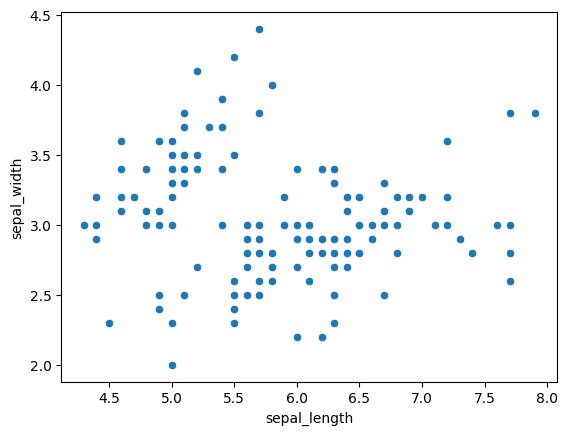

In [5]:
# plotting scatterplot
sns.scatterplot(data=df, x='sepal_length', y='sepal_width')

## **Anomaly Detection Implementation**

### **Isolation Forest**

In [6]:
# importing IsolationForest
from sklearn.ensemble import IsolationForest

In [20]:
clf = IsolationForest(contamination='auto') # contamination = 0.1, 0.2, 0.3 .....
clf.fit(df)
predictions = clf.predict(df)

In [21]:
predictions

array([ 1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1, -1, -1,
        1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

**-1** means Outlier and **1** means normal datapoint

In [22]:
# creating index
indexes = np.where(predictions < 0)

In [23]:
# creating array of dataset
X = df.values

In [11]:
import matplotlib.pyplot as plt

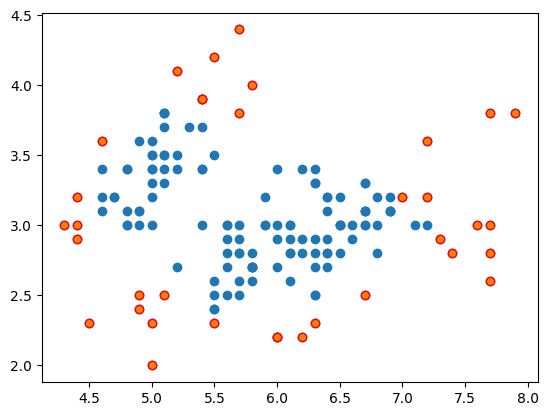

In [24]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.scatter(X[indexes, 0], X[indexes, 1], edgecolors='r')

### **DBScan**

In [25]:
# importing DBScan
from sklearn.cluster import DBSCAN

In [53]:
dbscan = DBSCAN(eps=0.20)
dbscan.fit(df)

DBSCAN(eps=0.2)

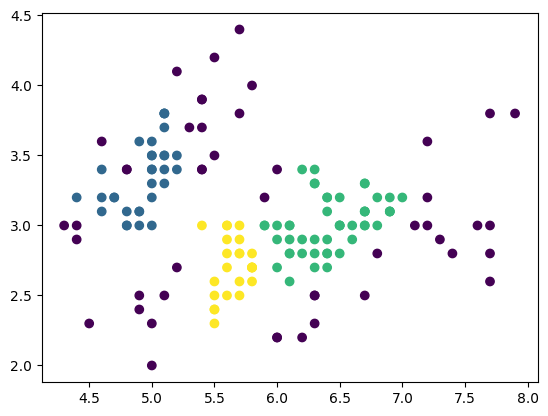

In [54]:
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_)

### **Local Outlier Factor**

In [55]:
# importing LocalOutlierFactor
from sklearn.neighbors import LocalOutlierFactor

In [104]:
clf = LocalOutlierFactor(n_neighbors=20)
predictions = clf.fit_predict(df)

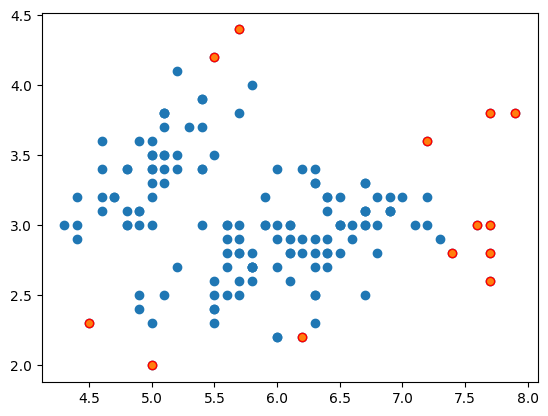

In [105]:
# creating index
indexes = np.where(predictions < 0)

# plotting scatter plot
plt.scatter(df.values[:, 0], df.values[:, 1])
plt.scatter(df.values[indexes, 0], df.values[indexes, 1], edgecolor='r')